# Problem Statement –
Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset.
a. Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results using
confusion matrix.

In [1]:
# Name : Rhutuja Vishwanath Patil
# Batch : B
# Roll No.: 2447029 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

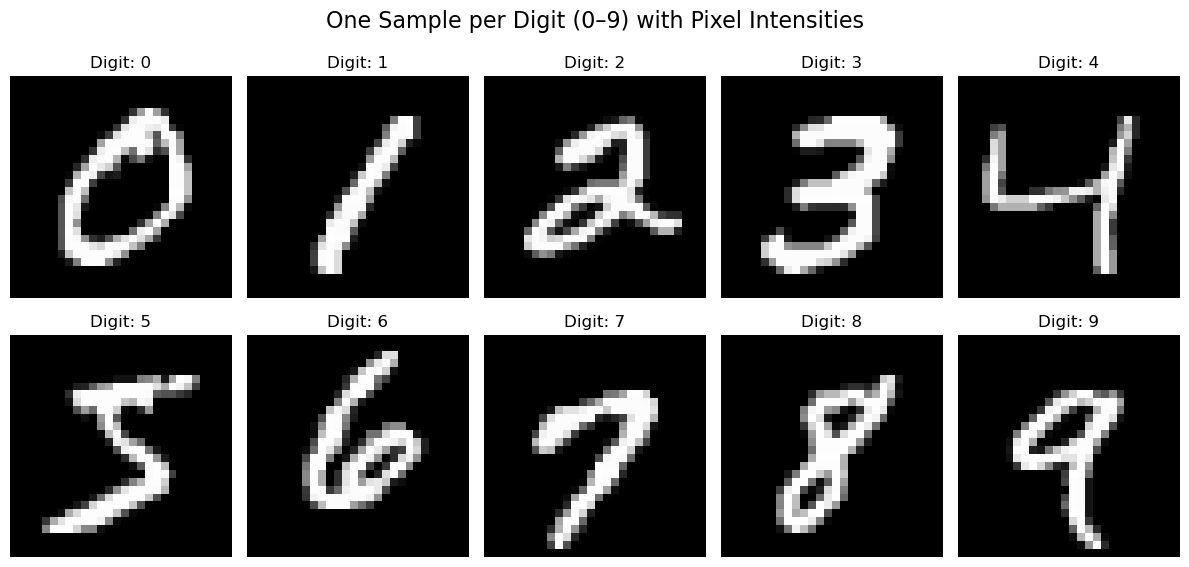

In [5]:
# Find one example of each digit 0-9
unique_digits = list(range(10))
samples = []

for digit in unique_digits:
    index = np.where(y_train == digit)[0][0]
    samples.append((x_train[index], y_train[index]))

# Display the digits and their pixel values
plt.figure(figsize=(12, 6))
for i, (image, label) in enumerate(samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Digit: {label}")
    plt.axis('off')
    # Overlay pixel values > threshold
    for j in range(28):
        for k in range(28):
            if image[j][k] > 180:  # adjust threshold to see clearer numbers
                plt.text(k, j, str(int(image[j][k])), fontsize=4, color='red')
plt.suptitle("One Sample per Digit (0–9) with Pixel Intensities", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\rhutu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.7880 - loss: 0.6656 - val_accuracy: 0.9822 - val_loss: 0.0631
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9652 - loss: 0.1174 - val_accuracy: 0.9858 - val_loss: 0.0525
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9756 - loss: 0.0830 - val_accuracy: 0.9887 - val_loss: 0.0381
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9801 - loss: 0.0664 - val_accuracy: 0.9917 - val_loss: 0.0334
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9824 - loss: 0.0541 - val_accuracy: 0.9905 - val_loss: 0.0323
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


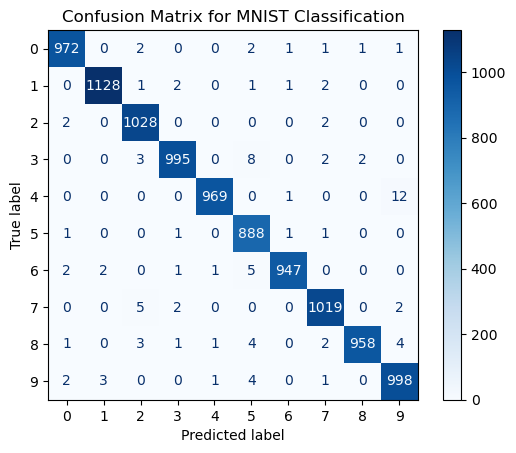

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9869 - loss: 0.0388

Test Accuracy: 0.9902


In [3]:
# a. DATA PREPROCESSING
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Reshape to (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

# b. DEFINE CNN MODEL AND TRAINING
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for MNIST
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)

# c. EVALUATE RESULTS
# Predict classes
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for MNIST Classification")
plt.show()

# Optional: Print final accuracy
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")